### spawn both cars side by side

In [5]:
import matplotlib.pyplot as plt	
import matplotlib.image as mpimg	
import numpy as np	
import glob	
import os	
import sys	
import time	
try:	
    sys.path.append(glob.glob('PythonAPI/carla/dist/carla-*%d.%d-%s.egg' % (	
        sys.version_info.major,	
        sys.version_info.minor,	
        'win-amd64' if os.name == 'nt' else 'linux-x86_64'))[0])	
except IndexError:	
    pass	
import carla	
import random	
import cv2	
import skimage.measure as measure	
#in synchronous mode, sensor data must be added to a queue	
import queue	
client = carla.Client('localhost', 2000)	
client.set_timeout(11.0)	
world = client.load_world('Town01_Opt')	
settings = world.get_settings()	
settings.fixed_delta_seconds = 0.05 #must be less than 0.1, or else physics will be noisy	
#must use fixed delta seconds and synchronous mode for python api controlled sim, or else 	
#camera and sensor data may not match simulation properly and will be noisy 	
settings.synchronous_mode = True 	
weather = carla.WeatherParameters(	
    cloudiness=0.0,	
    precipitation=0.0,	
    sun_altitude_angle=90.0)	
world.set_weather(weather)	
world.apply_settings(settings)


#add a BMW car
blueprints = world.get_blueprint_library().filter('vehicle.bmw.grandtourer')
spawn_points = world.get_map().get_spawn_points()
vehicle = world.spawn_actor(blueprints[0], spawn_points[0])
vehicle2 = world.spawn_actor(blueprints[0], spawn_points[1])
# vehicle.set_autopilot()
#attach a sensor rgb camera to the bmw
camera_bp = world.get_blueprint_library().find('sensor.camera.rgb')
camera_bp.set_attribute('image_size_x', '1920')
camera_bp.set_attribute('image_size_y', '1080')
camera_bp.set_attribute('fov', '110')
camera_transform = carla.Transform(carla.Location(x=-5.5, z=2.8), carla.Rotation(pitch=-15)) #carla.Transform(carla.Location(x=2.5, z=0.7), carla.Rotation(pitch=-15))
camera = world.spawn_actor(camera_bp, camera_transform, attach_to=vehicle)
camera2 = world.spawn_actor(camera_bp, camera_transform, attach_to=vehicle2)

#save images generated by this camera
im_width = 1920
im_height = 1080
image_queue = queue.Queue()
image_queue2 = queue.Queue()
camera.listen(image_queue.put)
camera2.listen(image_queue2.put)


timestamp = round(time.time())

world.load_map_layer(carla.MapLayer.Buildings)

world.tick()

#rgb camera
image = image_queue.get()
image2 = image_queue2.get()


image.save_to_disk(f"test_images/{timestamp}/1%06d.png" %(image.frame))
image2.save_to_disk(f"test_images/{timestamp}/2%06d.png" %(image.frame))
img = mpimg.imread(f"test_images/{timestamp}/1%06d.png" %(image.frame))
img2 = mpimg.imread(f"test_images/{timestamp}/2%06d.png" %(image.frame))
plt.imshow(img)

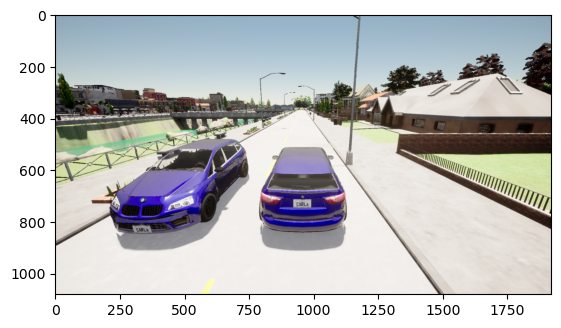

In [6]:
plt.imshow(img2)

### set first vehicle on autopilot and second vehicle follow the first vehicle

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import os
import sys
import time
try:
    sys.path.append(glob.glob('PythonAPI/carla/dist/carla-*%d.%d-%s.egg' % (
        sys.version_info.major,
        sys.version_info.minor,
        'win-amd64' if os.name == 'nt' else 'linux-x86_64'))[0])
except IndexError:
    pass
import carla
import random
import cv2
import skimage.measure as measure
#in synchronous mode, sensor data must be added to a queue
import queue
client = carla.Client('localhost', 2000)
client.set_timeout(11.0)
world = client.load_world('Town01_Opt')
settings = world.get_settings()
settings.fixed_delta_seconds = 0.05 #must be less than 0.1, or else physics will be noisy
#must use fixed delta seconds and synchronous mode for python api controlled sim, or else
#camera and sensor data may not match simulation properly and will be noisy
settings.synchronous_mode = True
weather = carla.WeatherParameters(
    cloudiness=0.0,
    precipitation=0.0,
    sun_altitude_angle=90.0)
world.set_weather(weather)
world.apply_settings(settings)

transform = random.choice(world.get_map().get_spawn_points()) 
m= world.get_map()
waypoint = m.get_waypoint(transform.location)

#add pedestrians on the road
blueprints = world.get_blueprint_library().filter('walker.pedestrian.*')

#add a BMW car
blueprints = world.get_blueprint_library().filter('vehicle.tesla.model3')
spawn_points = world.get_map().get_spawn_points()
vehicle = world.spawn_actor(blueprints[0], spawn_points[0])
vehicle2 = world.spawn_actor(blueprints[0], spawn_points[1])
vehicle.set_autopilot()
vehicle2.set_autopilot()

#attach a sensor rgb camera to the bmw
camera_bp = world.get_blueprint_library().find('sensor.camera.rgb')
camera_bp.set_attribute('image_size_x', '1920')
camera_bp.set_attribute('image_size_y', '1080')
camera_bp.set_attribute('fov', '110')
camera_transform = carla.Transform(carla.Location(x=-5.5, z=2.8), carla.Rotation(pitch=-15))
camera = world.spawn_actor(camera_bp, camera_transform, attach_to=vehicle)
camera2 = world.spawn_actor(camera_bp, carla.Transform(carla.Location(x=-5.5, z=2.8), carla.Rotation(pitch=-15)), attach_to=vehicle2)

#save images generated by this camera
im_width = 1920
im_height = 1080
image_queue = queue.Queue()
image_queue2 = queue.Queue()
camera.listen(image_queue.put)
camera2.listen(image_queue2.put)

dataset_dicts = []
global_count=0
timestamp = round(time.time())
for i in range(10000):
    #step
    world.tick()

    #rgb camera
    image = image_queue.get()
    image2 = image_queue2.get()


    if i%100==0:
        image.save_to_disk(f"test_images/{timestamp}/1%06d.png" %(image.frame))

        image2.save_to_disk(f"test_images/{timestamp}/2%06d.png" %(image2.frame))

    #drive vehicle to next waypoint on map
    # waypoint = random.choice(waypoint.next(5))
    # vehicle.set_transform(waypoint.transform)
    # vehicle2.set_transform(waypoint.transform)


ArgumentError: Python argument types in
    Vehicle.set_autopilot(Vehicle, Vehicle)
did not match C++ signature:
    set_autopilot(carla::client::Vehicle {lvalue}, bool enabled=True, unsigned short tm_port=8000)

### Add physics to vehicle

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import os
import sys
import time
try:
    sys.path.append(glob.glob('PythonAPI/carla/dist/carla-*%d.%d-%s.egg' % (
        sys.version_info.major,
        sys.version_info.minor,
        'win-amd64' if os.name == 'nt' else 'linux-x86_64'))[0])
except IndexError:
    pass
import carla
import random
import cv2
import skimage.measure as measure
#in synchronous mode, sensor data must be added to a queue
import queue
client = carla.Client('localhost', 2000)
client.set_timeout(11.0)
world = client.load_world('Town01_Opt')
settings = world.get_settings()
settings.fixed_delta_seconds = 0.05 #must be less than 0.1, or else physics will be noisy
#must use fixed delta seconds and synchronous mode for python api controlled sim, or else
#camera and sensor data may not match simulation properly and will be noisy
settings.synchronous_mode = True
weather = carla.WeatherParameters(
    cloudiness=0.0,
    precipitation=0.0,
    sun_altitude_angle=90.0)
world.set_weather(weather)
world.apply_settings(settings)

transform = random.choice(world.get_map().get_spawn_points()) 
m= world.get_map()
waypoint = m.get_waypoint(transform.location)

#add pedestrians on the road
blueprints = world.get_blueprint_library().filter('walker.pedestrian.*')

#add a BMW car
blueprints = world.get_blueprint_library().filter('vehicle.tesla.model3')
spawn_points = world.get_map().get_spawn_points()
vehicle = world.spawn_actor(blueprints[0], spawn_points[0])
vehicle2 = world.spawn_actor(blueprints[0], spawn_points[1])
#vehicle.set_autopilot()

#attach a sensor rgb camera to the bmw
camera_bp = world.get_blueprint_library().find('sensor.camera.rgb')
camera_bp.set_attribute('image_size_x', '1920')
camera_bp.set_attribute('image_size_y', '1080')
camera_bp.set_attribute('fov', '110')
camera_transform = carla.Transform(carla.Location(x=-5.5, z=2.8), carla.Rotation(pitch=-15)) #camera location
camera = world.spawn_actor(camera_bp, camera_transform, attach_to=vehicle)
camera2 = world.spawn_actor(camera_bp, carla.Transform(carla.Location(x=-5.5, z=2.8), carla.Rotation(pitch=-15)), attach_to=vehicle2) #camera location

#save images generated by this camera
im_width = 1920
im_height = 1080
image_queue = queue.Queue()
image_queue2 = queue.Queue()
camera.listen(image_queue.put)
camera2.listen(image_queue2.put)

dataset_dicts = []
global_count=0
timestamp = round(time.time())
for i in range(1000):
    #step
    world.tick()

    #rgb camera
    image = image_queue.get()
    image2 = image_queue2.get()


    if i%100==0:
        image.save_to_disk(f"test_images/{timestamp}/1%06d.png" %(image.frame))

        image2.save_to_disk(f"test_images/{timestamp}/2%06d.png" %(image2.frame))

    #drive vehicle to next waypoint on map, vehicle2 is autopilot
    #waypoint = random.choice(waypoint.next(5))
    #vehicle.set_transform(waypoint.transform)
    #vehicle2.set_transform(waypoint.transform)

    #add physics to vehicle1
    control = carla.VehicleControl()
    control.throttle = 0.5
    control.steer = 0.0

    #add physics to vehicle2
    control2 = carla.VehicleControl()
    control2.throttle = 0.5
    control2.steer = 0.0
    control2.brake = 0.0
    control2.hand_brake = False
    control2.manual_gear_shift = False
    vehicle2.apply_control(control2)
    control.brake = 0.0
    control.hand_brake = False
    control.manual_gear_shift = False
    vehicle.apply_control(control)


## start here

### Just a car roaming around town

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import os
import sys
import time

try:
    sys.path.append(glob.glob('PythonAPI/carla/dist/carla-*%d.%d-%s.egg' % (
        sys.version_info.major,
        sys.version_info.minor,
        'win-amd64' if os.name == 'nt' else 'linux-x86_64'))[0])
except IndexError:
    pass

import carla
import random
import cv2
import skimage.measure as measure

#in synchronous mode, sensor data must be added to a queue
import queue

client = carla.Client('localhost', 2000)
client.set_timeout(11.0)


world = client.load_world('Town03')
settings = world.get_settings()
settings.fixed_delta_seconds = 0.05 #must be less than 0.1, or else physics will be noisy
#must use fixed delta seconds and synchronous mode for python api controlled sim, or else 
#camera and sensor data may not match simulation properly and will be noisy 
settings.synchronous_mode = True 
world.apply_settings(settings)

## weather 
weather = carla.WeatherParameters(
    cloudiness=20.0,
    precipitation=20.0,
    sun_altitude_angle=110.0)

world.set_weather(weather)

blueprints = world.get_blueprint_library().filter('*')
# for blueprint in random.sample(list(blueprints), 30):
#     print(blueprint.id)
#     for attr in blueprint:
#         print('  - {}'.format(attr))

actor_list = []

blueprint_library = world.get_blueprint_library()
bp = random.choice(blueprint_library.filter('vehicle')) # lets choose a vehicle at random

# lets choose a random spawn point
transform = random.choice(world.get_map().get_spawn_points()) 

#spawn a vehicle
vehicle = world.spawn_actor(bp, transform) 
actor_list.append(vehicle)

vehicle.set_autopilot(True)

m= world.get_map()
waypoint = m.get_waypoint(transform.location)

#lets add more vehicles
# for _ in range(0, 200):
#     transform = random.choice(m.get_spawn_points())

#     bp_vehicle = random.choice(blueprint_library.filter('vehicle'))

#     # This time we are using try_spawn_actor. If the spot is already
#     # occupied by another object, the function will return None.
#     other_vehicle = world.try_spawn_actor(bp_vehicle, transform)
#     if other_vehicle is not None:
#         #print(npc)
#         other_vehicle.set_autopilot(True)
#         actor_list.append(other_vehicle)

blueprint_library = world.get_blueprint_library()
# weirdobj_bp = blueprint_library.find('static.prop.fountain')
# weirdobj_transform = random.choice(world.get_map().get_spawn_points())
# weirdobj_transform = carla.Transform(carla.Location(x=230, y=195, z=40), carla.Rotation(yaw=180))
# weird_obj = world.try_spawn_actor(weirdobj_bp, weirdobj_transform)
# actor_list.append(weird_obj)

camera_bp = blueprint_library.find('sensor.camera.rgb')
camera_bp.set_attribute('image_size_x', '1920')
camera_bp.set_attribute('image_size_y', '1080')
# camera_transform = carla.Transform(carla.Location(x=1.5, z=2.4))
camera_transform = carla.Transform(carla.Location(x=-5.5, z=2.8), carla.Rotation(pitch=-15))
camera = world.spawn_actor(camera_bp, camera_transform, attach_to=vehicle)
image_queue = queue.Queue()
camera.listen(image_queue.put)
actor_list.append(camera)

dataset_dicts = []
global_count=0
timestamp = round(time.time())
for i in range(1000):
    #step
    world.tick()

    #rgb camera
    image = image_queue.get()

    
    if i%100==0:
        image.save_to_disk(f"test_images/{timestamp}/%06d.png" %(image.frame))

        # img = mpimg.imread(f"test_images/{timestamp}/%06d.png" %(image.frame))

    #drive vehicle to next waypoint on map
    waypoint = random.choice(waypoint.next(1.5))
    vehicle.set_transform(waypoint.transform)

### Add another car and attach a camera to it

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import os
import sys
import time

try:
    sys.path.append(glob.glob('PythonAPI/carla/dist/carla-*%d.%d-%s.egg' % (
        sys.version_info.major,
        sys.version_info.minor,
        'win-amd64' if os.name == 'nt' else 'linux-x86_64'))[0])
except IndexError:
    pass

import carla
import random
import cv2
import skimage.measure as measure

#in synchronous mode, sensor data must be added to a queue
import queue

client = carla.Client('localhost', 2000)
client.set_timeout(11.0)


world = client.load_world('Town03')
settings = world.get_settings()
settings.fixed_delta_seconds = 0.05 #must be less than 0.1, or else physics will be noisy
#must use fixed delta seconds and synchronous mode for python api controlled sim, or else 
#camera and sensor data may not match simulation properly and will be noisy 
settings.synchronous_mode = True 
world.apply_settings(settings)

## weather 
weather = carla.WeatherParameters(
    cloudiness=20.0,
    precipitation=20.0,
    sun_altitude_angle=110.0)

world.set_weather(weather)

blueprints = world.get_blueprint_library().filter('*')
# for blueprint in random.sample(list(blueprints), 30):
#     print(blueprint.id)
#     for attr in blueprint:
#         print('  - {}'.format(attr))

actor_list = []

blueprint_library = world.get_blueprint_library()
waypoints = random.choice(world.get_map().get_spawn_points()) 

bp = random.choice(blueprint_library.filter('vehicle')) # lets choose a vehicle at random
vehicle = world.spawn_actor(bp, waypoints[0]) 
vehicle2 = world.spawn_actor(bp, waypoints[1]) 
actor_list.append(vehicle)
vehicle.set_autopilot(True)
vehicle2.set_autopilot(vehicle)
actor_list.append(vehicle)
actor_list.append(vehicle2)

m= world.get_map()
waypoint = m.get_waypoint(transform1.location)

blueprint_library = world.get_blueprint_library()

camera_bp = blueprint_library.find('sensor.camera.rgb')
camera_bp.set_attribute('image_size_x', '1920')
camera_bp.set_attribute('image_size_y', '1080')
# camera_transform = carla.Transform(carla.Location(x=1.5, z=2.4))
camera_transform = carla.Transform(carla.Location(x=-5.5, z=2.8), carla.Rotation(pitch=-15))
camera = world.spawn_actor(camera_bp, camera_transform, attach_to=vehicle)
image_queue = queue.Queue()
camera.listen(image_queue.put)
actor_list.append(camera)

camera_transform2 = carla.Transform(carla.Location(x=-5.5, z=2.8), carla.Rotation(pitch=-15))
camera2 = world.spawn_actor(camera_bp, camera_transform2, attach_to=vehicle2)
image_queue2 = queue.Queue()
camera2.listen(image_queue2.put)
actor_list.append(camera2)


dataset_dicts = []
global_count=0
timestamp = round(time.time())
for i in range(1000):
    #step
    world.tick()

    #rgb camera2
    image2 = image_queue2.get()

    #rgb camera1
        #rgb camera1
    image = image_queue.get()


    
    if i%100==0:
        image.save_to_disk(f"test_images/{timestamp}/1%06d.png" %(image.frame))
        image2.save_to_disk(f"test_images/{timestamp}/2%06d.png" %(image2.frame))

    #drive vehicle2 to next waypoint on map
    waypoint2 = random.choice(waypoint.next(3.0))
    vehicle2.set_transform(waypoint2.transform)

        # img = mpimg.imread(f"test_images/{timestamp}/%06d.png" %(image.frame))

    #drive vehicle to next waypoint on map
    waypoint = random.choice(waypoint.next(3.0))
    vehicle.set_transform(waypoint.transform)


### add some pedestrians in town

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import os
import sys
import time

try:
    sys.path.append(glob.glob('PythonAPI/carla/dist/carla-*%d.%d-%s.egg' % (
        sys.version_info.major,
        sys.version_info.minor,
        'win-amd64' if os.name == 'nt' else 'linux-x86_64'))[0])
except IndexError:
    pass

import carla
import random
import cv2
import skimage.measure as measure

#in synchronous mode, sensor data must be added to a queue
import queue

client = carla.Client('localhost', 2000)
client.set_timeout(11.0)


world = client.load_world('Town03')
settings = world.get_settings()
settings.fixed_delta_seconds = 0.05 #must be less than 0.1, or else physics will be noisy
#must use fixed delta seconds and synchronous mode for python api controlled sim, or else 
#camera and sensor data may not match simulation properly and will be noisy 
settings.synchronous_mode = True 
world.apply_settings(settings)

## weather 
weather = carla.WeatherParameters(
    cloudiness=20.0,
    precipitation=20.0,
    sun_altitude_angle=110.0)

world.set_weather(weather)

actor_list = []

blueprint_library = world.get_blueprint_library()
bp = random.choice(blueprint_library.filter('vehicle')) # lets choose a vehicle at random

# lets choose a random spawn point
transform = random.choice(world.get_map().get_spawn_points()) 

#spawn a vehicle
vehicle = world.spawn_actor(bp, transform) 
actor_list.append(vehicle)

vehicle.set_autopilot(True)

#spawn pedestrians
for i in range(10):
    bp = random.choice(blueprint_library.filter('walker.pedestrian.*'))
    transform = random.choice(world.get_map().get_spawn_points())
    walker = world.spawn_actor(bp, transform)
    actor_list.append(walker)


m= world.get_map()
waypoint = m.get_waypoint(transform.location)

camera_bp = blueprint_library.find('sensor.camera.rgb')
# camera_transform = carla.Transform(carla.Location(x=1.5, z=2.4))
camera_transform = carla.Transform(carla.Location(x=-5.5, z=2.8), carla.Rotation(pitch=-15))
camera = world.spawn_actor(camera_bp, camera_transform, attach_to=vehicle)
image_queue = queue.Queue()
camera.listen(image_queue.put)
actor_list.append(camera)

dataset_dicts = []
global_count=0
timestamp = round(time.time())
for i in range(1000):
    #step
    world.tick()

    #rgb camera
    image = image_queue.get()

    
    if i%100==0:
        image.save_to_disk(f"test_images/{timestamp}/%06d.png" %(image.frame))

        # img = mpimg.imread(f"test_images/{timestamp}/%06d.png" %(image.frame))

    #drive vehicle to next waypoint on map
    waypoint = random.choice(waypoint.next(1.5))
    vehicle.set_transform(waypoint.transform)
